# Final Project
#### By : Hugo Fahpryan Lawrens

### Read The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('Data_Negara_HELP.csv')

In [2]:
df_backup = df.copy(deep=True)
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Dari data tersebut terdapat 167 baris dan 10 kolom.
10 kolom dari data tersebut adalah kolom: Negara, Kematian_anak, Ekspor, Kesehatan, Impor, Pendapatan, Inflasi, Harapan_hidup, Jumlah_fertiliti dan GDPperkapita

### Explore The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.min()

Negara              Afghanistan
Kematian_anak               2.6
Ekspor                    0.109
Kesehatan                  1.81
Impor                    0.0659
Pendapatan                  609
Inflasi                   -4.21
Harapan_hidup              32.1
Jumlah_fertiliti           1.15
GDPperkapita                231
dtype: object

In [6]:
df.max()

Negara              Zambia
Kematian_anak          208
Ekspor                 200
Kesehatan             17.9
Impor                  174
Pendapatan          125000
Inflasi                104
Harapan_hidup         82.8
Jumlah_fertiliti      7.49
GDPperkapita        105000
dtype: object

#### Multivariate analysis

Saya melakukan multivariate analysis menggunakan regplot, karna dengan regplot kita dapat melihat sebaran serta korelasi dari tiap data.

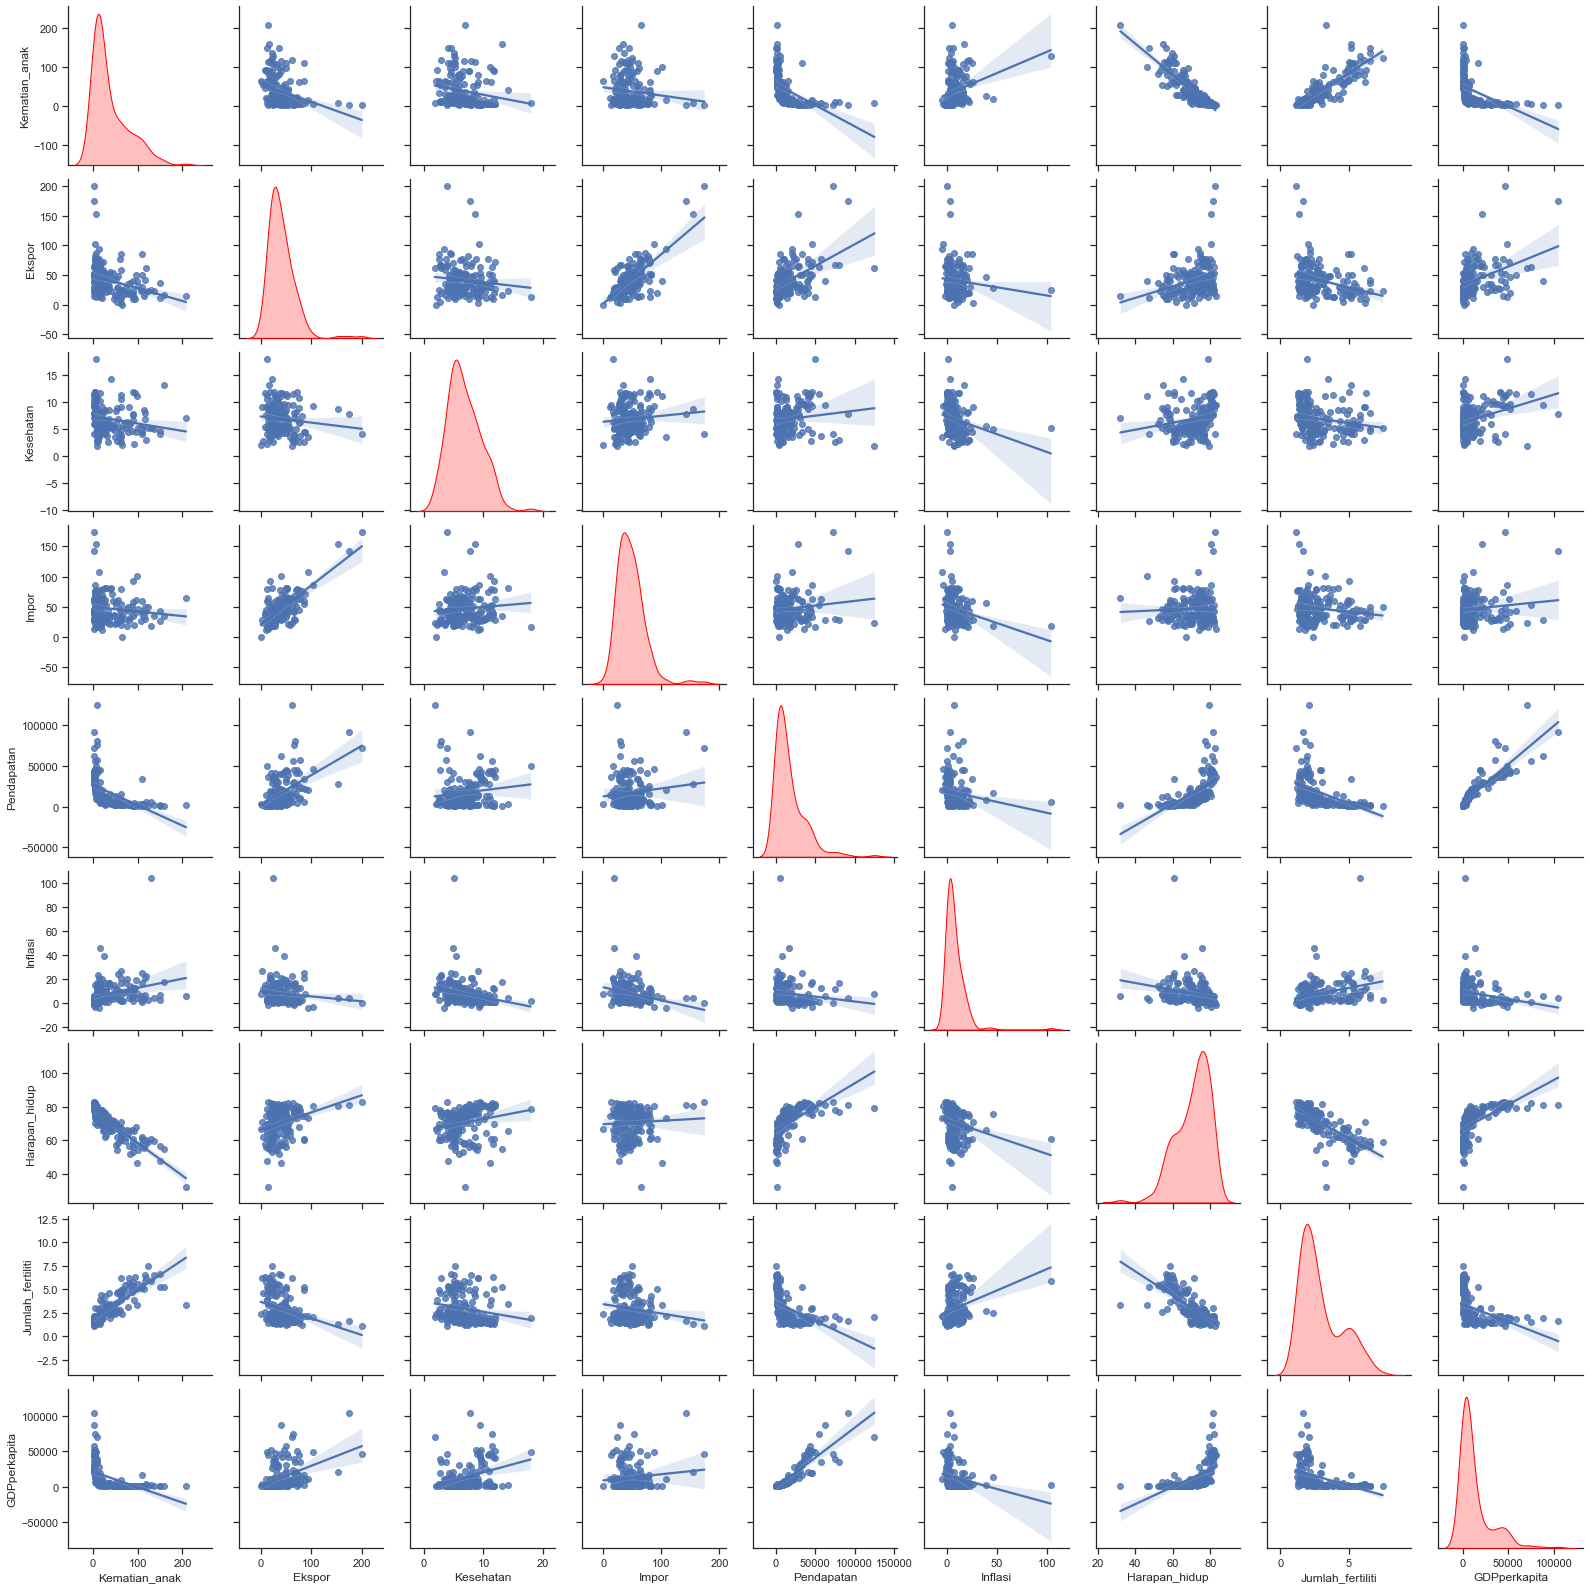

In [7]:
sns.set(style='ticks')
sns.pairplot(df,kind='reg', diag_kind='kde', diag_kws=dict(color='red'))

<AxesSubplot:>

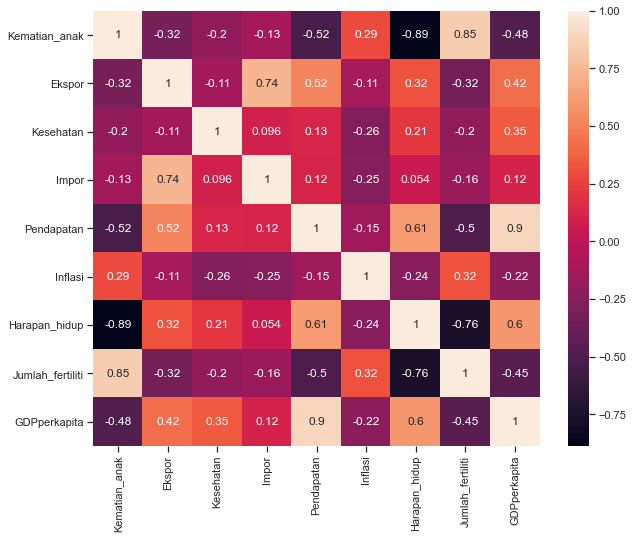

In [8]:
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, fmt='.2g')

### Feature Selection

Berdasarkan hasil dari analisis multivariat menggunakan regplot dan heatmap kita dapat melihat bahwa Harapan_hidup memiliki korelasi positif dengan GDPperkapita. Dari hasil heatmap kita menggunakan method pearson untuk menemukan seberapa besar korelasi antar data, kita dapat melihat korelasi GDPperkapita dengan Harapan_hidup memiliki korelasi sebesar 0.6. Saya akan melakukan analisis terhadap data Harapan_hidup dan GDPperkapita, dengan asumsi jika memberikan donasi kepada suatu negara yang memiliki GDPperkapita yang rendah dapat meningkatkan GDPperkapita suatu negara sehingga mempengaruhi Harapan_hidup dinegara tersebut.

In [30]:
# filtering data

df_help = df[['Negara','GDPperkapita','Harapan_hidup']]
df_help

,Negara,GDPperkapita,Harapan_hidup
0,Afghanistan,553,56.2
1,Albania,4090,76.3
2,Algeria,4460,76.5
3,Angola,3530,60.1
4,Antigua and Barbuda,12200,76.8
...,...,...,...
162,Vanuatu,2970,63.0
163,Venezuela,13500,75.4
164,Vietnam,1310,73.1
165,Yemen,1310,67.5


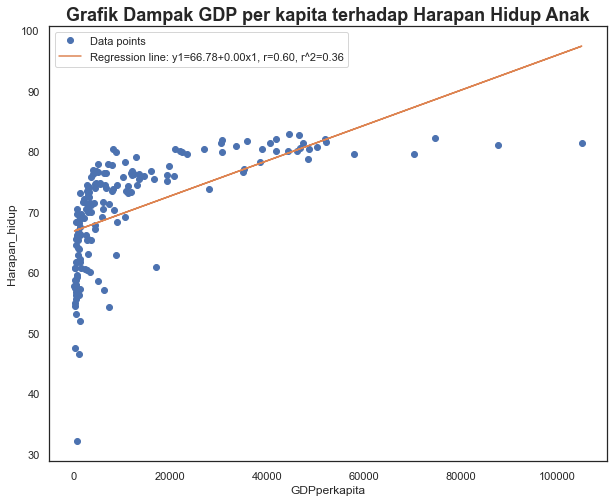

In [31]:
x1 = df_help['GDPperkapita']
y1 = df_help['Harapan_hidup']

slope, intercept, r, p, stderr = scipy.stats.linregress(x1, y1)
line = f'Regression line: y1={intercept:.2f}+{slope:.2f}x1, r={r:.2f}, r^2={r**2:.2f}'
line
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x1, y1, linewidth=0, marker='o', label='Data points')
ax.plot(x1, intercept + slope * x1, label=line)
ax.set_xlabel('GDPperkapita')
ax.set_ylabel('Harapan_hidup')
ax.legend(facecolor='white')
plt.title('Grafik Dampak GDP per kapita terhadap Harapan Hidup Anak',fontdict={'fontweight': 'bold','fontsize': '18'})
plt.show()

Berdasarkan hasil analisis diatas sebelum dilakukan handling terhadap data pencilannya kita yakin 60% bahwa sekitar 36% tinggi rendahnya Harapan Hidup Anak suatu negara ditentukan oleh GDP per kapita suatu negara.

#### Check 20 countries lowest GDP per capita and Life Expectancy

<ipython-input-11-d7a640578a46>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(filter_df_help_low_GDP['Negara'], rotation=90)
<ipython-input-11-d7a640578a46>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(filter_df_help_low_Life['Negara'], rotation=90)


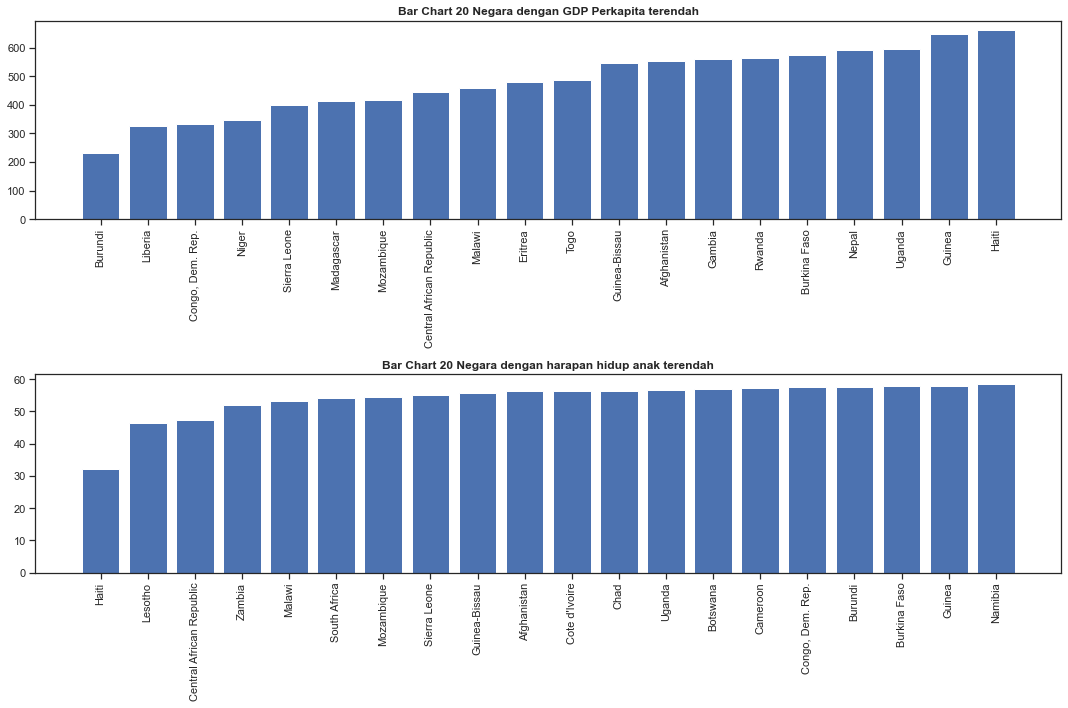

In [11]:
fig, axarr = plt.subplots(figsize=(15,10),ncols=1,nrows=2)

filter_df_help_low_GDP = df_help.loc[:,['Negara',
                                    'GDPperkapita',
                                    'Harapan_hidup']
                                ].sort_values(by=['GDPperkapita'], ascending=True).head(20)
filter_df_help_low_Life = df_help.loc[:,['Negara',
                                    'GDPperkapita',
                                    'Harapan_hidup']
                                ].sort_values(by=['Harapan_hidup'], ascending=True).head(20)

ax3 = axarr[0]
ax4 = axarr[1]

ax3.bar(filter_df_help_low_GDP['Negara'],filter_df_help_low_GDP['GDPperkapita'])
ax3.set_title('Bar Chart 20 Negara dengan GDP Perkapita terendah', fontdict={'fontweight': 'bold'})
ax3.set_xticklabels(filter_df_help_low_GDP['Negara'], rotation=90)


ax4.bar(filter_df_help_low_Life['Negara'], filter_df_help_low_Life['Harapan_hidup'])
ax4.set_title('Bar Chart 20 Negara dengan harapan hidup anak terendah', fontdict={'fontweight': 'bold'})
ax4.set_xticklabels(filter_df_help_low_Life['Negara'], rotation=90)

plt.tight_layout()
plt.show()

Dari data filter diatas kita mendapatkan 20 negara dengan GDP perkapita dan Harapan hidup anak yang rendah. Tapi kita akan melakukan penelitian lebih lanjut untuk memastikan 10 negara yang lebih berhak untuk menerima donasi dari HELP International berdasarkan GDP perkapita dan Harapan hidup anak.

#### Check Missing Value

In [12]:
df_help.isnull().sum()

Negara           0
GDPperkapita     0
Harapan_hidup    0
dtype: int64

Dari data tersebut kita tidak menemukan missing value.

#### Check Ouliers

<AxesSubplot:xlabel='Harapan_hidup'>

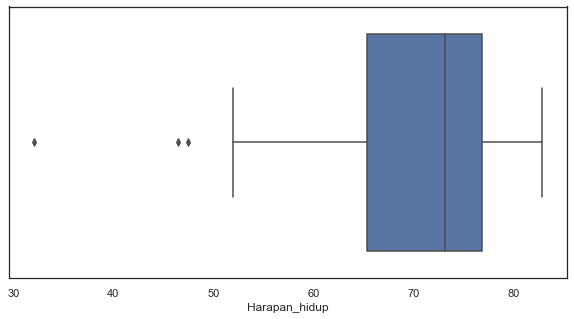

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x='Harapan_hidup', data=df_help)

<AxesSubplot:xlabel='GDPperkapita'>

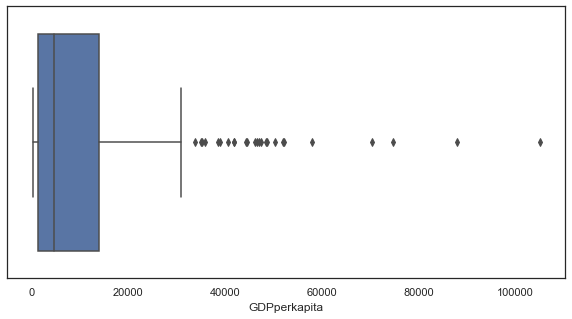

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x='GDPperkapita', data=df_help)

Dari data di atas, kita dapat melihat bahwa data kita tidak memiliki missing value tetapi memiliki outliers. Jadi kita harus handling outliers agar kita dapat melakukan clustering terhadap data kita.

#### Handling Outliers with IQR

Mengganti nilai outliers minimum dan maksimum ke dalam minimum dan maksimumnya

In [35]:
Q1=(df_help[['Harapan_hidup','GDPperkapita']]).quantile(0.25)
Q3=(df_help[['Harapan_hidup','GDPperkapita']]).quantile(0.75)
IQR=Q3-Q1

print('Nilai Q1: ')
print(Q1)
print('='*50)

print('Nilai Q3: ')
print(Q3)
print('='*50)

print('Nilai IQR: ')
print(IQR)
print('='*50)

nilai_min = Q1 - (1.5*IQR)
print('Nilai minimum dari masing masing variabel adalah: ')
print(nilai_min)
print('='*50)

nilai_max = Q3 + (1.5*IQR)
print('Nilai maksimum dari masing masing variabel adalah: ')
print(nilai_max)

# mengganti nilai outliers dengan nilai minimum dan maksimum dari data
outliers_min = (df_help < nilai_min)
outliers_max = (df_help > nilai_max)
df_help = df_help.mask(outliers_min, nilai_min, axis=1)
df_help = df_help.mask(outliers_max, nilai_max, axis=1)



df_help.describe()

Nilai Q1: 
Harapan_hidup      65.3
GDPperkapita     1330.0
Name: 0.25, dtype: float64
Nilai Q3: 
Harapan_hidup       76.8
GDPperkapita     14050.0
Name: 0.75, dtype: float64
Nilai IQR: 
Harapan_hidup       11.5
GDPperkapita     12720.0
dtype: float64
Nilai minimum dari masing masing variabel adalah: 
Harapan_hidup       48.05
GDPperkapita    -17750.00
dtype: float64
Nilai maksimum dari masing masing variabel adalah: 
Harapan_hidup       94.05
GDPperkapita     33130.00
dtype: float64


,GDPperkapita,Harapan_hidup
count,167.000000,167.000000
mean,10351.281437,70.663772
std,11612.044330,8.522535
min,231.000000,48.050000
25%,1330.000000,65.300000
50%,4660.000000,73.100000
75%,14050.000000,76.800000
max,33130.000000,82.800000


<AxesSubplot:xlabel='Harapan_hidup'>

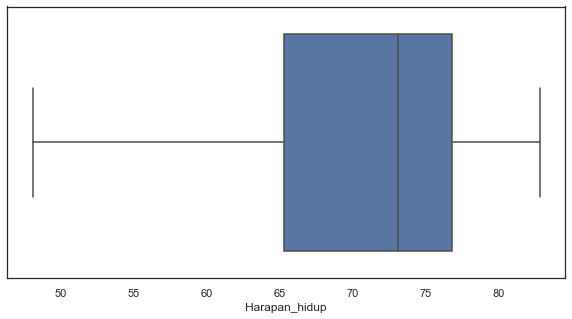

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='Harapan_hidup', data=df_help)

<AxesSubplot:xlabel='GDPperkapita'>

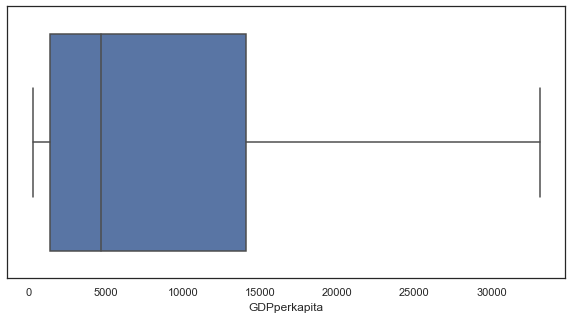

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='GDPperkapita', data=df_help)

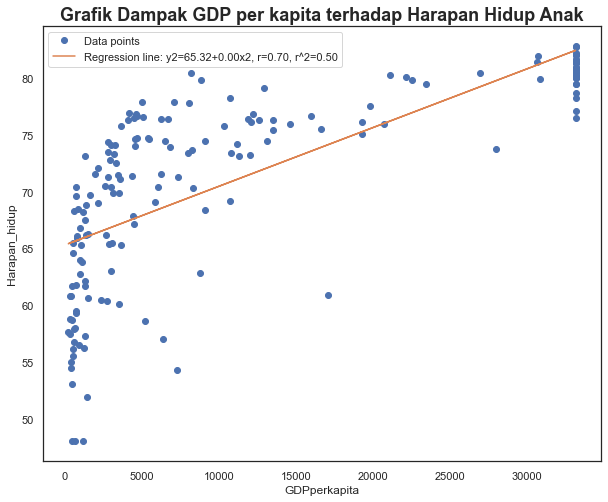

In [38]:
x2 = df_help['GDPperkapita']
y2 = df_help['Harapan_hidup']

slope, intercept, r, p, stderr = scipy.stats.linregress(x2, y2)
line = f'Regression line: y2={intercept:.2f}+{slope:.2f}x2, r={r:.2f}, r^2={r**2:.2f}'
line
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x2, y2, linewidth=0, marker='o', label='Data points')
ax.plot(x2, intercept + slope * x2, label=line)
ax.set_xlabel('GDPperkapita')
ax.set_ylabel('Harapan_hidup')
ax.legend(facecolor='white')
plt.title('Grafik Dampak GDP per kapita terhadap Harapan Hidup Anak',fontdict={'fontweight': 'bold','fontsize': '18'})
plt.show()

Berdasarkan hasil analisis diatas setelah dilakukan handling terhadap data pencilannya kita yakin 70% bahwa sekitar 50% tinggi rendahnya Harapan Hidup Anak suatu negara ditentukan oleh GDP per kapita suatu negara.

#### Rescaling menggunakan StandardScaler

In [19]:
sc = StandardScaler()
df_help_no_outlier = df_help[['Harapan_hidup','GDPperkapita']]
df_help_std = sc.fit_transform(df_help_no_outlier)
#cek tugas 1 week 4

#### Clustering menggunakan KMeans

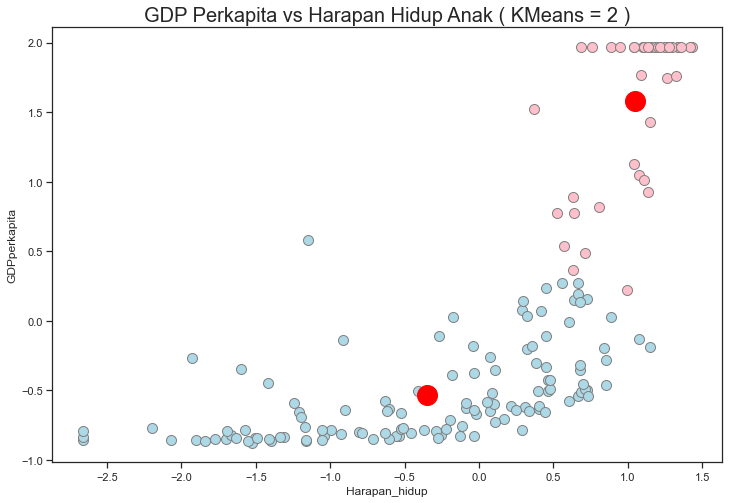

In [20]:
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_help_std)
labels1 = kmeans1.labels_

new_df_help_std = pd.DataFrame(data = df_help_std, columns = ['Harapan_hidup','GDPperkapita'])
new_df_help_std['label_kmeans1'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(new_df_help_std.Harapan_hidup[new_df_help_std.label_kmeans1 == 0], new_df_help_std['GDPperkapita'][new_df_help_std.label_kmeans1 == 0], c='lightblue', s=100, edgecolor='grey',linestyle='-')
plt.scatter(new_df_help_std.Harapan_hidup[new_df_help_std.label_kmeans1 == 1], new_df_help_std['GDPperkapita'][new_df_help_std.label_kmeans1 == 1], c='pink', s=100, edgecolor='grey',linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=400);
plt.title('GDP Perkapita vs Harapan Hidup Anak ( KMeans = 2 )', fontdict={'fontsize': 20})
plt.xlabel('Harapan_hidup')
plt.ylabel('GDPperkapita')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


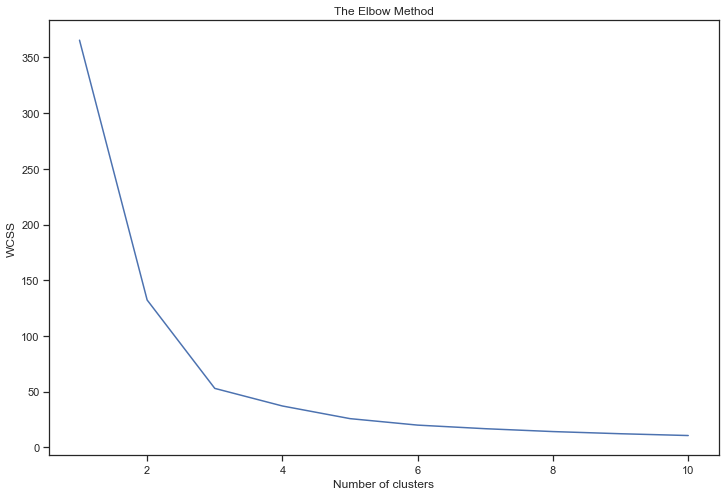

In [21]:
#Finding k kluster with elbow method
plt.figure(figsize=(12,8))
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state = 42)
    kmeans.fit(new_df_help_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

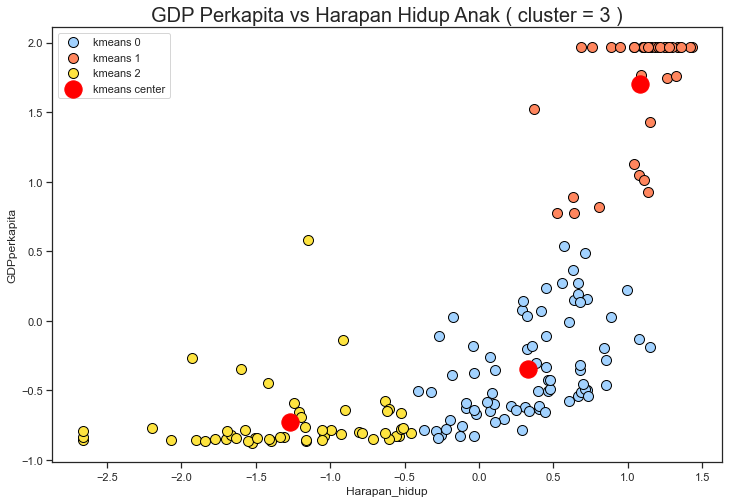

In [22]:
# Menggunakan k=3 (rekomendasi methode Elbow)
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_help_std)
labels2 = kmeans2.labels_

new_df_help_std = pd.DataFrame(data = df_help_std, columns = ['Harapan_hidup','GDPperkapita'])
new_df_help_std['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df_help_std.Harapan_hidup[new_df_help_std.label_kmeans2 == 0], new_df_help_std['GDPperkapita'][new_df_help_std.label_kmeans2 == 0], c='#A2D2FF', s=100, edgecolor='black',linestyle='-', label='kmeans 0')
plt.scatter(new_df_help_std.Harapan_hidup[new_df_help_std.label_kmeans2 == 1], new_df_help_std['GDPperkapita'][new_df_help_std.label_kmeans2 == 1], c='#FF865E', s=100, edgecolor='black',linestyle='-', label='kmeans 1')
plt.scatter(new_df_help_std.Harapan_hidup[new_df_help_std.label_kmeans2 == 2], new_df_help_std['GDPperkapita'][new_df_help_std.label_kmeans2 == 2], c='#FEE440', s=100, edgecolor='black',linestyle='-', label='kmeans 2')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=300, label='kmeans center');
plt.title('GDP Perkapita vs Harapan Hidup Anak ( cluster = 3 )', fontdict={'fontsize': 20})
plt.xlabel('Harapan_hidup')
plt.ylabel('GDPperkapita')
plt.legend()
plt.show()

Dari data scatterplot menggunakan KMeans = 3 (rekomendasi dari elbow method), kita dapat melihat negara-negara dengan GDPperkapita dan Harapan_hidup yang rendah berada di plot berwarna kuning pada kmeans 2.

#### Collect the data with kmeans column

In [23]:
# Get kmeans column
df_kmeans=pd.DataFrame(new_df_help_std.iloc[:,2])
df_kmeans

,label_kmeans2
0,2
1,0
2,0
3,2
4,0
...,...
162,2
163,0
164,0
165,0


In [24]:
# Merge Data awal dengan label_kmeans2

new_df_help = [df_help, df_kmeans]
new_df_help = pd.concat(new_df_help, axis=1)
new_df_help

,Negara,GDPperkapita,Harapan_hidup,label_kmeans2
0,Afghanistan,553,56.2,2
1,Albania,4090,76.3,0
2,Algeria,4460,76.5,0
3,Angola,3530,60.1,2
4,Antigua and Barbuda,12200,76.8,0
...,...,...,...,...
162,Vanuatu,2970,63.0,2
163,Venezuela,13500,75.4,0
164,Vietnam,1310,73.1,0
165,Yemen,1310,67.5,0


#### Filter and sort countries that are eligible to receive donations

In [25]:
eligible_country = new_df_help[new_df_help['label_kmeans2']==2
                              ].loc[:,['Negara',
                                       'GDPperkapita',
                                       'Harapan_hidup']
                                   ].sort_values(by=['GDPperkapita',
                                                     'Harapan_hidup'
                                                    ], ascending=True).reset_index(drop=True).head(10)
eligible_country

,Negara,GDPperkapita,Harapan_hidup
0,Burundi,231,57.70
1,Liberia,327,60.80
2,"Congo, Dem. Rep.",334,57.50
3,Niger,348,58.80
4,Sierra Leone,399,55.00
5,Madagascar,413,60.80
6,Mozambique,419,54.50
7,Central African Republic,446,48.05
8,Malawi,459,53.10
9,Eritrea,482,61.70


#### Univariate Eligible Country with Bar Chart

<ipython-input-26-44dab8463901>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(eligible_country['Negara'], rotation=90)
<ipython-input-26-44dab8463901>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(eligible_country['Negara'], rotation=90)


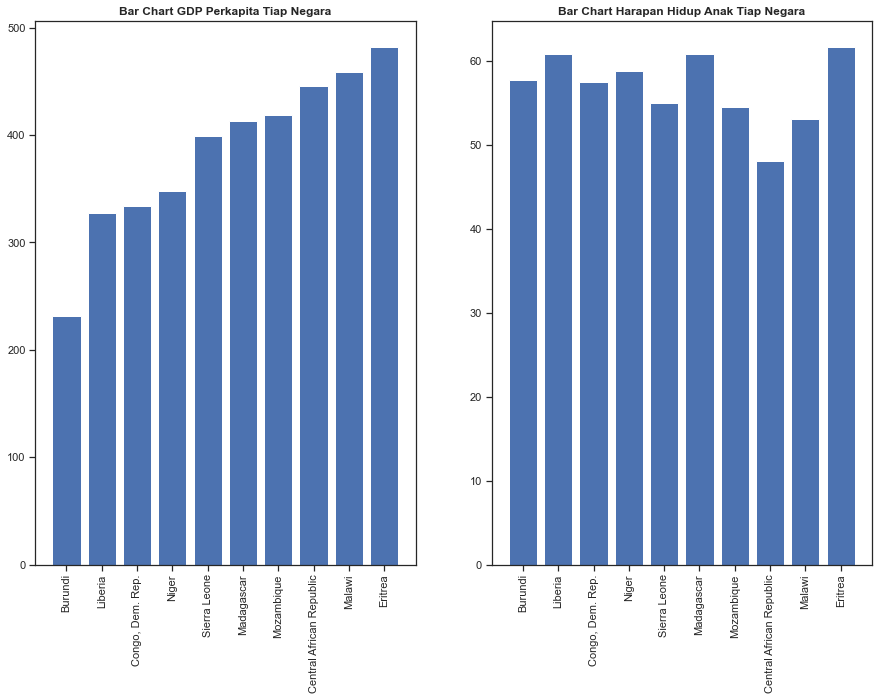

In [26]:
fig, axarr = plt.subplots(figsize=(15,10),ncols=2,nrows=1)

ax1 = axarr[0]
ax2 = axarr[1]
labels = eligible_country.Negara
x1 = eligible_country.GDPperkapita
x2 = eligible_country.Harapan_hidup

ax1.bar(eligible_country['Negara'], eligible_country['GDPperkapita'])
ax1.set_title('Bar Chart GDP Perkapita Tiap Negara', fontdict={'fontweight': 'bold'})
ax1.set_xticklabels(eligible_country['Negara'], rotation=90)


ax2.bar(eligible_country['Negara'], eligible_country['Harapan_hidup'])
ax2.set_title('Bar Chart Harapan Hidup Anak Tiap Negara', fontdict={'fontweight': 'bold'})
ax2.set_xticklabels(eligible_country['Negara'], rotation=90)

plt.show()

#### Bivariate Eligible Country with Scatterplot

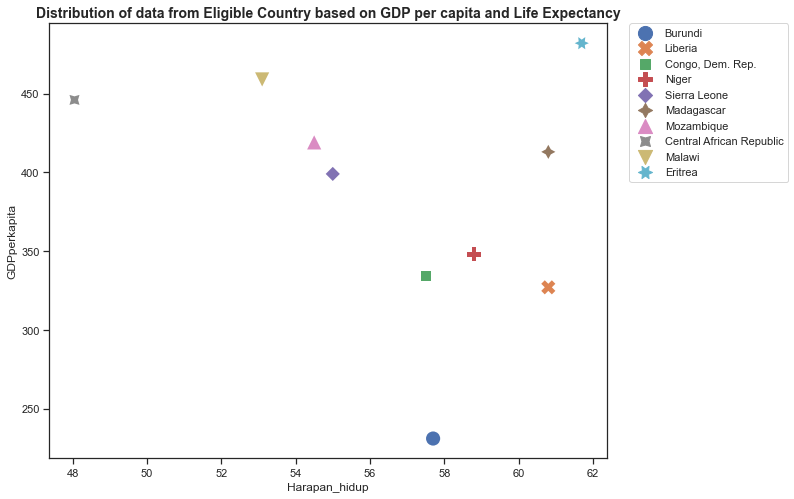

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(ax = ax, data=eligible_country, 
                x='Harapan_hidup', y='GDPperkapita', 
                style='Negara', hue='Negara', size='Negara', 
                sizes=(200,200), linewidth=0)
ax.set_title('Distribution of data from Eligible Country based on GDP per capita and Life Expectancy', 
             fontdict={'fontweight': 'bold', 'fontsize':'14'})
sns.set_style('white')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show()


## Kesimpulan

#### Negara-negara yang berhak menerima donasi adalah: 

In [28]:
eligible_country.loc[:,['Negara']]

,Negara
0,Burundi
1,Liberia
2,"Congo, Dem. Rep."
3,Niger
4,Sierra Leone
5,Madagascar
6,Mozambique
7,Central African Republic
8,Malawi
9,Eritrea
